### This notebook does some simple exploratory data analysis on the meta-data for government communications.
Due to contraints with downloading text, and time contraints, natural language processing of the text was not possible, but that will be the next step.

In [24]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#load csv files
gov_URLs = pd.read_csv('/Users/paulhershaw/brainstation_course/project_folder/stone/data/gov_articles_URLs.csv')
gov_articles_text = pd.read_csv('/Users/paulhershaw/brainstation_course/project_folder/stone/data/gov_articles_text.csv')

In [7]:
print(f"This data set will be {gov_URLs.shape[0]} articles and we have {gov_URLs.shape[1]} features for each article before downloading the text.")

This data is 65572 rows and 6 columns


In [8]:
# I am still designing a scraper to download the text from the URLs. However, some text has been downloaded and I will use this to test my model.
print(f"We have a sample data set with {gov_articles_text.shape[0]} articles and we have {gov_articles_text.shape[1]} features for each article after downloading the text.")

We have a sample data set with 500 articles and we have 9 features for each article after downloading the text.


In [9]:
#Description of the URL data set
gov_URLs.describe()

,Title,Link,Date,Department,Article Type,Summary
count,65572,65572,65572,65544,65572,65571
unique,18577,63925,3072,92,13,60026
top,Not specified,https://www.canada.ca/en/global-affairs/news/2...,2015-07-31,Service Canada,news releases,Ministers and Government of Canada officials t...
freq,44610,3,197,7605,36219,47


In [10]:
#Description of the text data set
gov_articles_text.describe()

,Title,Link,Date,Department,Article Type,Summary,Canonical Link,Location,News Release Text
count,500,500,500,499,500,500,500,500,401
unique,375,500,431,61,6,499,500,27,252
top,Title not available,https://www.canada.ca/en/global-affairs/news/2...,2015-07-31,Service Canada,news releases,The health and well-being of Canadians are the...,https://www.canada.ca/en/global-affairs/news/2...,Location not found,Skipping Media Advisory
freq,126,1,4,66,253,2,1,149,126


In [19]:
#Check data types of gov_URLs
gov_URLs.dtypes

Title                   object
Link                    object
Date            datetime64[ns]
Department              object
Article Type            object
Summary                 object
dtype: object

In [16]:
#Check data types of gov_articles_text
gov_articles_text.dtypes

Title                object
Link                 object
Date                 object
Department           object
Article Type         object
Summary              object
Canonical Link       object
Location             object
News Release Text    object
dtype: object

In [28]:
#unique values for article Type
unique_count_type = gov_URLs['Article Type'].value_counts()
filtered_unique_count_type = unique_count_type[unique_count_type >= 100]


filtered_unique_count_type

Article Type
news releases       36219
media advisories    16398
backgrounders        5682
statements           5281
speeches             1670
readouts              314
Name: count, dtype: int64

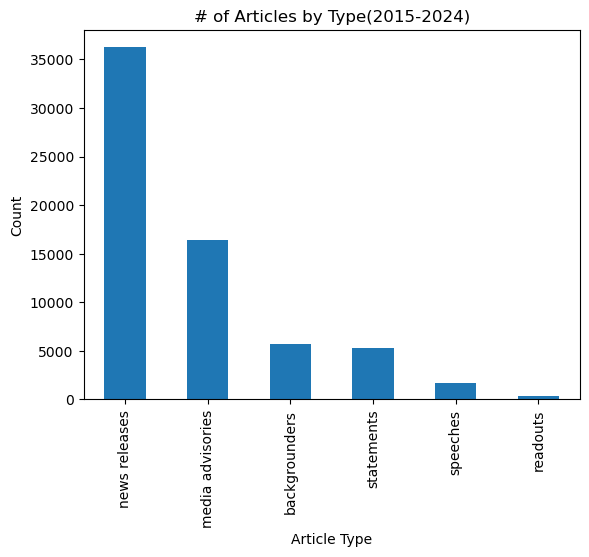

In [31]:
#Bar chart of article type - filter out types with less than 100 articles to make the chart more readable - Also, I think the smaller counts are errors.
filtered_unique_count_type.plot(kind='bar')
plt.title('# of Articles by Type(2015-2024)')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.show()


In [40]:
#unique values for article Type
unique_count_department = gov_URLs['Department'].value_counts()
filtered_unique_count_department = unique_count_department[unique_count_department >= 500]
filtered_unique_count_department

Department
Service Canada                                                       7605
Infrastructure Canada                                                4251
Global Affairs Canada                                                4201
Innovation, Science and Economic Development Canada                  2864
Employment and Social Development Canada                             2814
Atlantic Canada Opportunities Agency                                 2807
Canadian Heritage                                                    2754
National Defence                                                     2178
Canada Economic Development for Quebec Regions                       2042
Parks Canada                                                         2001
Correctional Service Canada                                          1994
Department of Finance Canada                                         1850
Environment and Climate Change Canada                                1810
Agriculture and Agri-Food C

## Article counts by department
These results are very surprising, and require further analysis. I wonder if there is error.

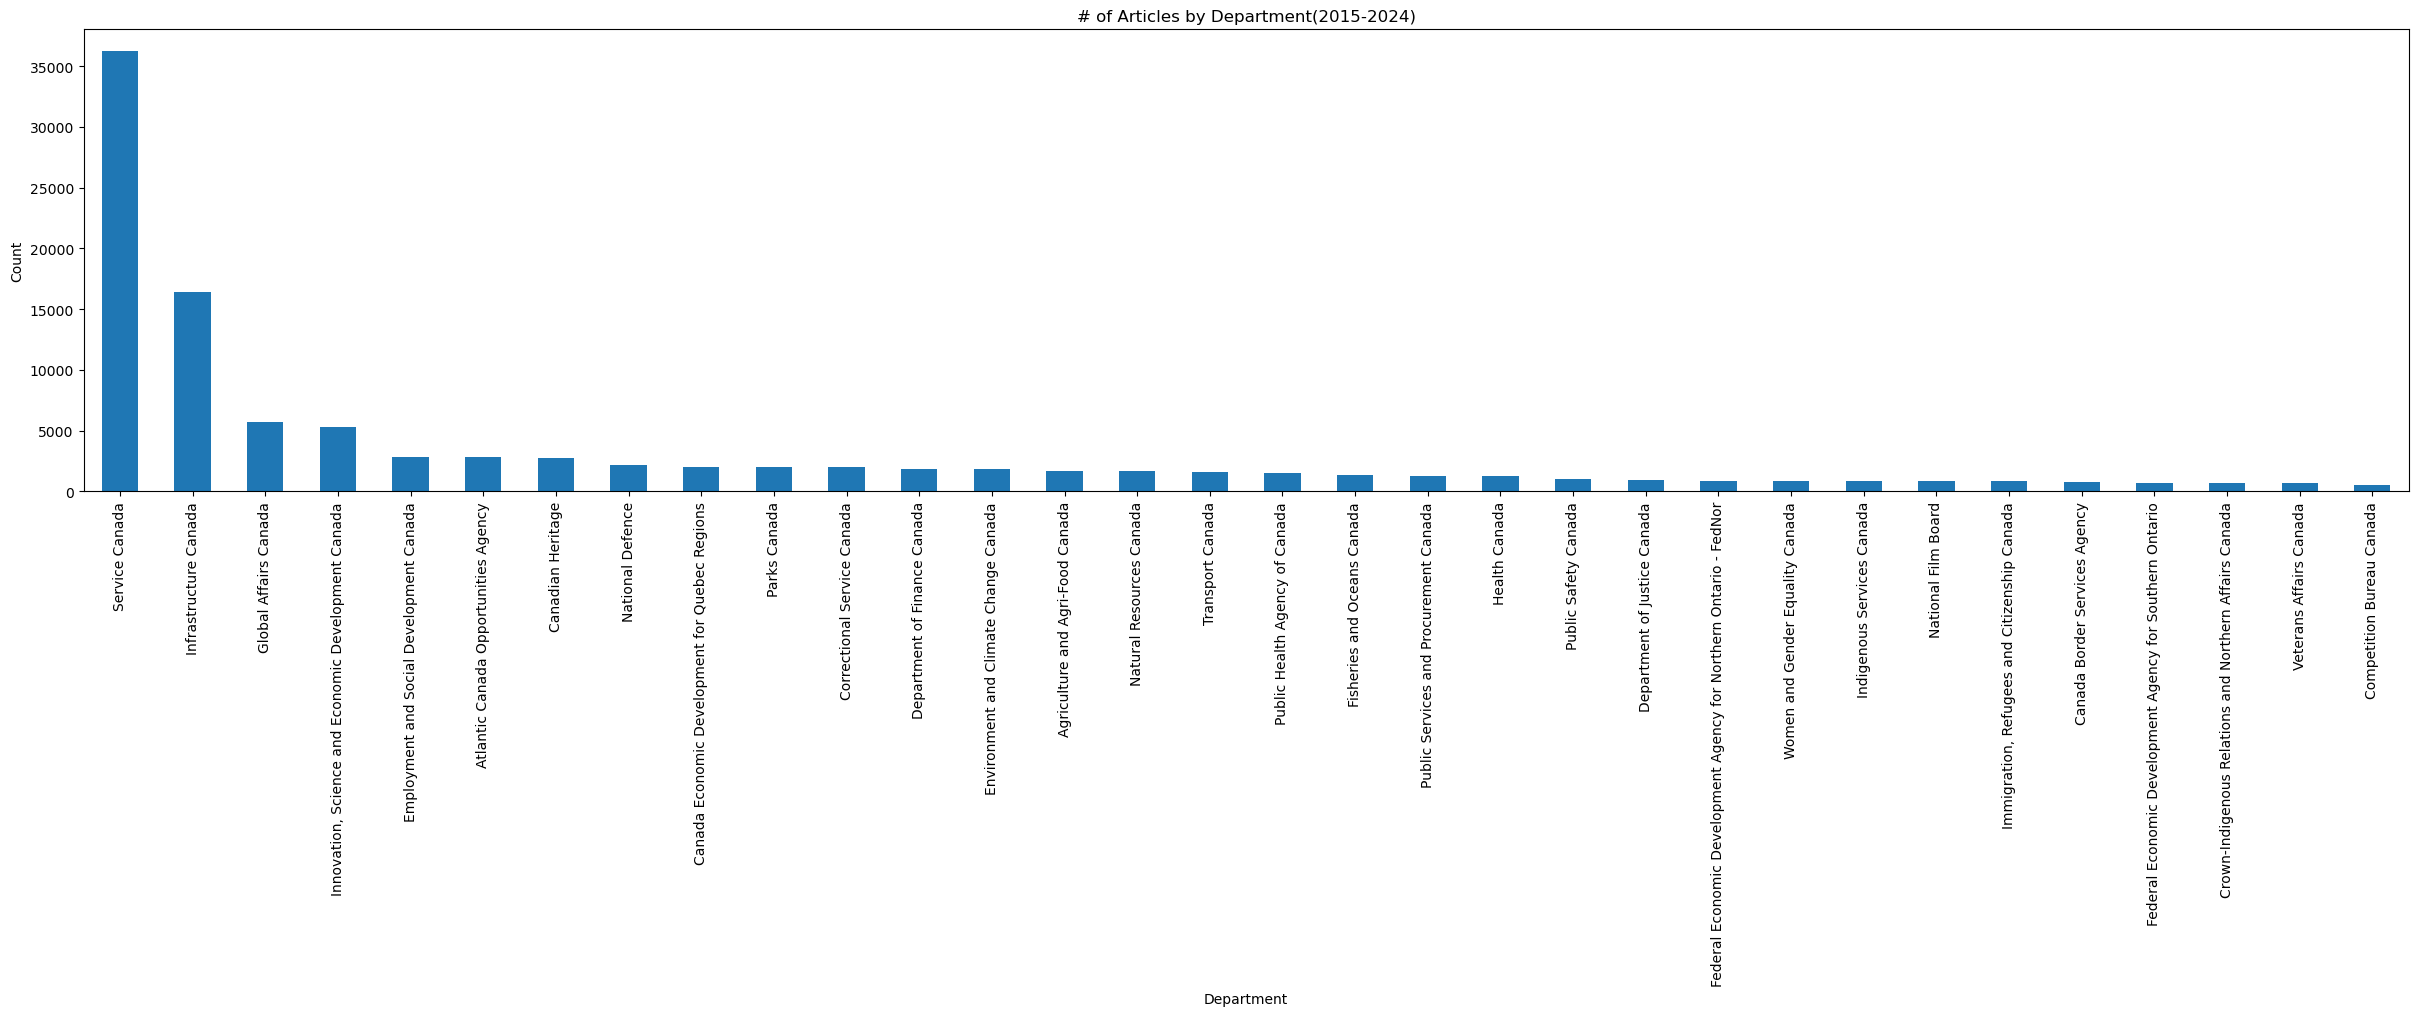

In [45]:
#Bar chart of department - filter out departments  with less than 500 articles to make the chart more readable.
filtered_unique_count.plot(kind='bar', figsize=(30, 6)) 
filtered_unique_count_department.plot(kind='bar')
plt.title('# of Articles by Department(2015-2024)')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

In [18]:
#Convert Date to datetime
gov_URLs['Date'] = pd.to_datetime(gov_URLs['Date'])

In [23]:
unique_count_month = gov_URLs['Date'].dt.to_period('M').value_counts()
sorted_unique_count = unique_count_month.sort_index()

print(sorted_unique_count)


Date
2015-01     724
2015-02     742
2015-03     905
2015-04     962
2015-05    1074
           ... 
2023-09     448
2023-10     563
2023-11     552
2023-12     502
2024-01       3
Freq: M, Name: count, Length: 108, dtype: int64


## Article counts by month and year
These results are very surprising, and require further analysis. I wonder if there is error.

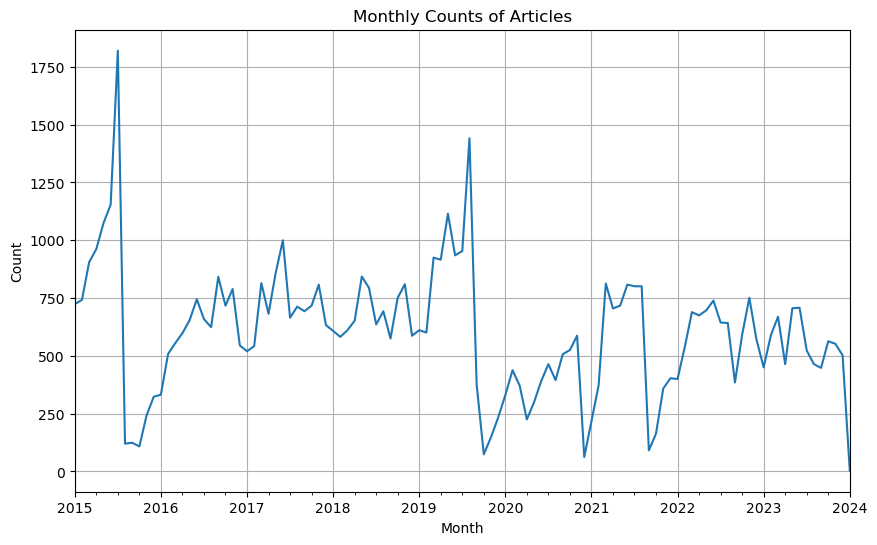

In [42]:
#Line Graph of monthly counts of articles.
sorted_unique_count.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Counts of Articles')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.show()